In [5]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import widgets 
from ipywidgets import interactive

## DEFINE RE-USABLE METHODS

def rotX(theta): # build a rotation matrix around the y-axis
    R = np.eye(3)
    R[1,1] = np.cos(theta)
    R[1,2] = -np.sin(theta)
    R[2,1] = np.sin(theta)
    R[2,2] = np.cos(theta)
    return R

def rotY(theta): # build a rotation matrix around the y-axis
    R = np.eye(3)
    R[0,0] = np.cos(theta)
    R[0,2] = np.sin(theta)
    R[2,0] = -np.sin(theta)
    R[2,2] = np.cos(theta)
    return R

def rotZ(theta): # build a rotation matrix around the y-axis
    R = np.eye(3)
    R[0,0] = np.cos(theta)
    R[0,1] = -np.sin(theta)
    R[1,0] = np.sin(theta)
    R[1,1] = np.cos(theta)
    return R
  

In [6]:
class plane(object): # make a child of the base class `object`
    def __init__(self, num_points_sides = 30, num_points_back = 20):
        # these define our frame in the xy-plane
        self.tail = [0, -20, 0]
        self.nose = [0, 50, 0]
        self.leftwing = [-20, -20, 0]
        self.rightwing = [20, -20, 0]
        self.points = []
        
        # we fit a parabola on the back
        xwidth = self.rightwing[0] - self.leftwing[0]
        for x in np.linspace(self.leftwing[0], self.rightwing[0], num_points_back): # x values from wing to wing
            self.points.append( [x, -(1.5/xwidth)*(x-self.rightwing[0])*(x-self.leftwing[0]) + self.leftwing[1], 0 ] )
        
        # we can add a parabola as a spine
        ywidth = self.nose[1] - self.tail[1]
        for y in np.linspace(self.tail[1], self.nose[1], num_points_back): # x values from wing to wing
            self.points.append( [0, y, -(0.5/ywidth)*(y-self.nose[1])*(y-self.tail[1])  ] )
            
        # and lines on the sides
        slope_left = (self.nose[1] - self.leftwing[1])/(self.nose[0] - self.leftwing[0] )
        slope_right = (self.nose[1] - self.rightwing[1])/(self.nose[0] - self.rightwing[0]) 
        
        for x in np.linspace(self.leftwing[0], self.nose[0], num_points_sides): # x values from left wing to center
            self.points.append( [x, slope_left*x + self.nose[1], 0] )
        
        for x in np.linspace(self.nose[0], self.rightwing[0], num_points_sides): # x values from center to right wing
            self.points.append( [x, slope_right*x + self.nose[1], 0] )
            
        # you can add more points to the geometry of our airplane, for now we leave it as a triangle.
    
    def update(self, R): # this is the utility function that is used by the others.
        l = []
        for p in self.points:
            l.append(np.dot(R, p))
        self.points = l
        pass
    
    def pitch(self, theta=np.pi/16):
        R = rotX(theta) # get rotation matrix
        self.update(R) # call the update function.
        pass
    
    def roll(self, theta=np.pi/16):
        R = rotY(theta) # get rotation matrix
        self.update(R) # call the update function.
        pass
    
    def yaw(self, theta=np.pi/16):
        R = rotZ(theta) # get rotation matrix
        self.update(R) # call the update function.
        pass
    
    def plot(self, min_dot_size = 10, scale_factor = 40):
        plt.cla() # clear our axes
        N = np.array(self.points).transpose()
        m = np.max(N[:,2]) - np.min(N[:,2])
#         alpha=0.1+0.9*(p[2]-np.min(N[:,2]))/m,
        for p in self.points:
            plt.scatter(p[0], p[1], c='k', s=min_dot_size +scale_factor*(p[2]-np.min(N[:,2]))/m )
#         plt.xlim([-50, 50])
#         plt.ylim([-20, 70])
        plt.axis('equal')
        plt.show()



In [7]:
### HANDLER FUNCTION.
def render(roll_angle, pitch_angle, yaw_angle):
    try:
        P = plane() # instantiate our class.
        P.roll(roll_angle)
        P.pitch(pitch_angle)
        P.yaw(yaw_angle)
        P.plot()
    except RuntimeWarning:
        pass
    return None

sliders = [widgets.FloatSlider(val = 0, min=-np.pi/2, max=np.pi/2, step=np.pi/50, continuous_update=False) 
       for _ in range(3)]
interactive(render, roll_angle=sliders[0], pitch_angle=sliders[1], yaw_angle=sliders[2]) 

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='roll_angle', max=1.57079632…

## Below is how to draw a circle

In [79]:
def drawellipse(center = [0,0], radius = 1, k=1, h=1, N=50):
    assert len(center) == 2 # good practice to do things like this.
    x0, y0 = center
    x = np.linspace(x0-h*radius , x0+h*radius, N)
    y = np.sqrt(radius**2 - ((x-x0)/h)**2 )*k # from the eq for an ellipse
    plt.plot(x, -y+y0, c='blue')
    plt.plot(x, y+y0, c='red')
    plt.scatter(center[0],center[1],c='green')
    plt.xlim([-50, 50]) # optional stuff here... 
    plt.ylim([-50,50]) 
    plt.axis('equal')
    plt.show()
    return None
  
def drawcircle(center = [0,0], radius=2, k=1, h=1, N=50 ):
    return drawellipse(center=center, radius=radius, k=k, h=h, N=N)

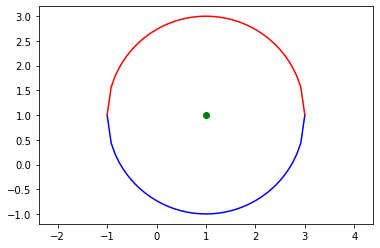

In [81]:
drawcircle([1,1], 2.0, 1, 1, 50)

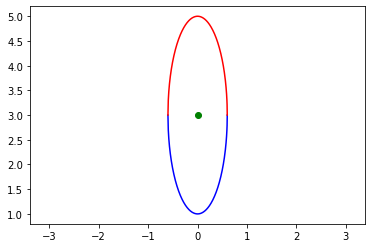

In [82]:
drawcircle([0,3], 2.0, 1, .3, 350)

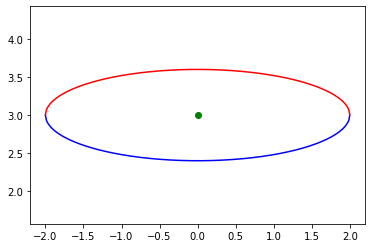

In [83]:
drawcircle([0,3], 2.0, .3, 1, 350)